In [1]:
%matplotlib inline

In [2]:
"""Systematic variations of 2yr numu sample"""
from copy import deepcopy
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./paper.mplstyle')

import matplotlib2tikz

/data/icecube/software/LVTools_package/anaconda/envs/lvtools/lib/python2.7/site-packages/matplotlib2tikz/__init__.py:31: UserWarning: matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.
  warnings.warn("matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.")


In [3]:
import lvsearchpy as lv

# paths
effective_area_path='/data/icecube/data/Astro_numu_north_2yr/effective_area_release/effective_area.h5'
events_path='/data/icecube/software/LVTools_package/LVTools/data/simple_corrected_data_release.dat'
chris_flux_path='/data/icecube/data/Astro_numu_north_2yr/effective_area_release/conventional_flux.h5'
kaon_flux_path='/data/icecube/software/LVTools_package/LVTools/data/kaon_flux.h5'
pion_flux_path='/data/icecube/software/LVTools_package/LVTools/data/pion_flux.h5'
prompt_flux_path='/data/icecube/software/LVTools_package/LVTools/data/prompt_flux.h5'

In [4]:
# constructing object
lvsearch = lv.LVSearch(effective_area_path,events_path,chris_flux_path,kaon_flux_path,pion_flux_path,prompt_flux_path)
lvsearch.SetEnergyExponent(6.)
lvsearch.SetVerbose(False)

In [5]:
binning = np.logspace(np.log10(400), np.log10(18e3), 18)

In [6]:
# Null
n = [1e-100] * 3

# norm_conv, dCR_index, pik, norm_prompt, norm_astro, dastro_index
# null_bf = lvsearch.llh(n)[:-1] + n
null_bf = [1, 0, 1, 1, 1, 0] + n

print null_bf

[1, 0, 1, 1, 1, 0, 1e-100, 1e-100, 1e-100]


In [7]:
def parse_exp(x):
    h = np.sum(x, axis=(0,1))
    return np.concatenate([[h[0]], h])

In [8]:
null_exp = parse_exp(lvsearch.GetExpectationDistribution(null_bf))

s = deepcopy(null_bf)
s[0] = 1.4
norm_conv_p = parse_exp(lvsearch.GetExpectationDistribution(s))
s[0] = 0.6
norm_conv_n = parse_exp(lvsearch.GetExpectationDistribution(s))

s = deepcopy(null_bf)
s[1] = 0.05
dCR_index_p = parse_exp(lvsearch.GetExpectationDistribution(s))
s[1] = -0.05
dCR_index_n = parse_exp(lvsearch.GetExpectationDistribution(s))

s = deepcopy(null_bf)
s[2] = 1.1
pik_p = parse_exp(lvsearch.GetExpectationDistribution(s))
s[2] = 0.9
pik_n = parse_exp(lvsearch.GetExpectationDistribution(s))

s = deepcopy(null_bf)
s[3] = 0
prompt_p = parse_exp(lvsearch.GetExpectationDistribution(s))
s[3] = 5
prompt_n = parse_exp(lvsearch.GetExpectationDistribution(s))

s = deepcopy(null_bf)
s[4] = 0
astro_p = parse_exp(lvsearch.GetExpectationDistribution(s))
s[4] = 5
astro_n = parse_exp(lvsearch.GetExpectationDistribution(s))

s = deepcopy(null_bf)
s[5] = 0.5
dastro_index_p = parse_exp(lvsearch.GetExpectationDistribution(s))
s[5] = -0.5
dastro_index_n = parse_exp(lvsearch.GetExpectationDistribution(s))

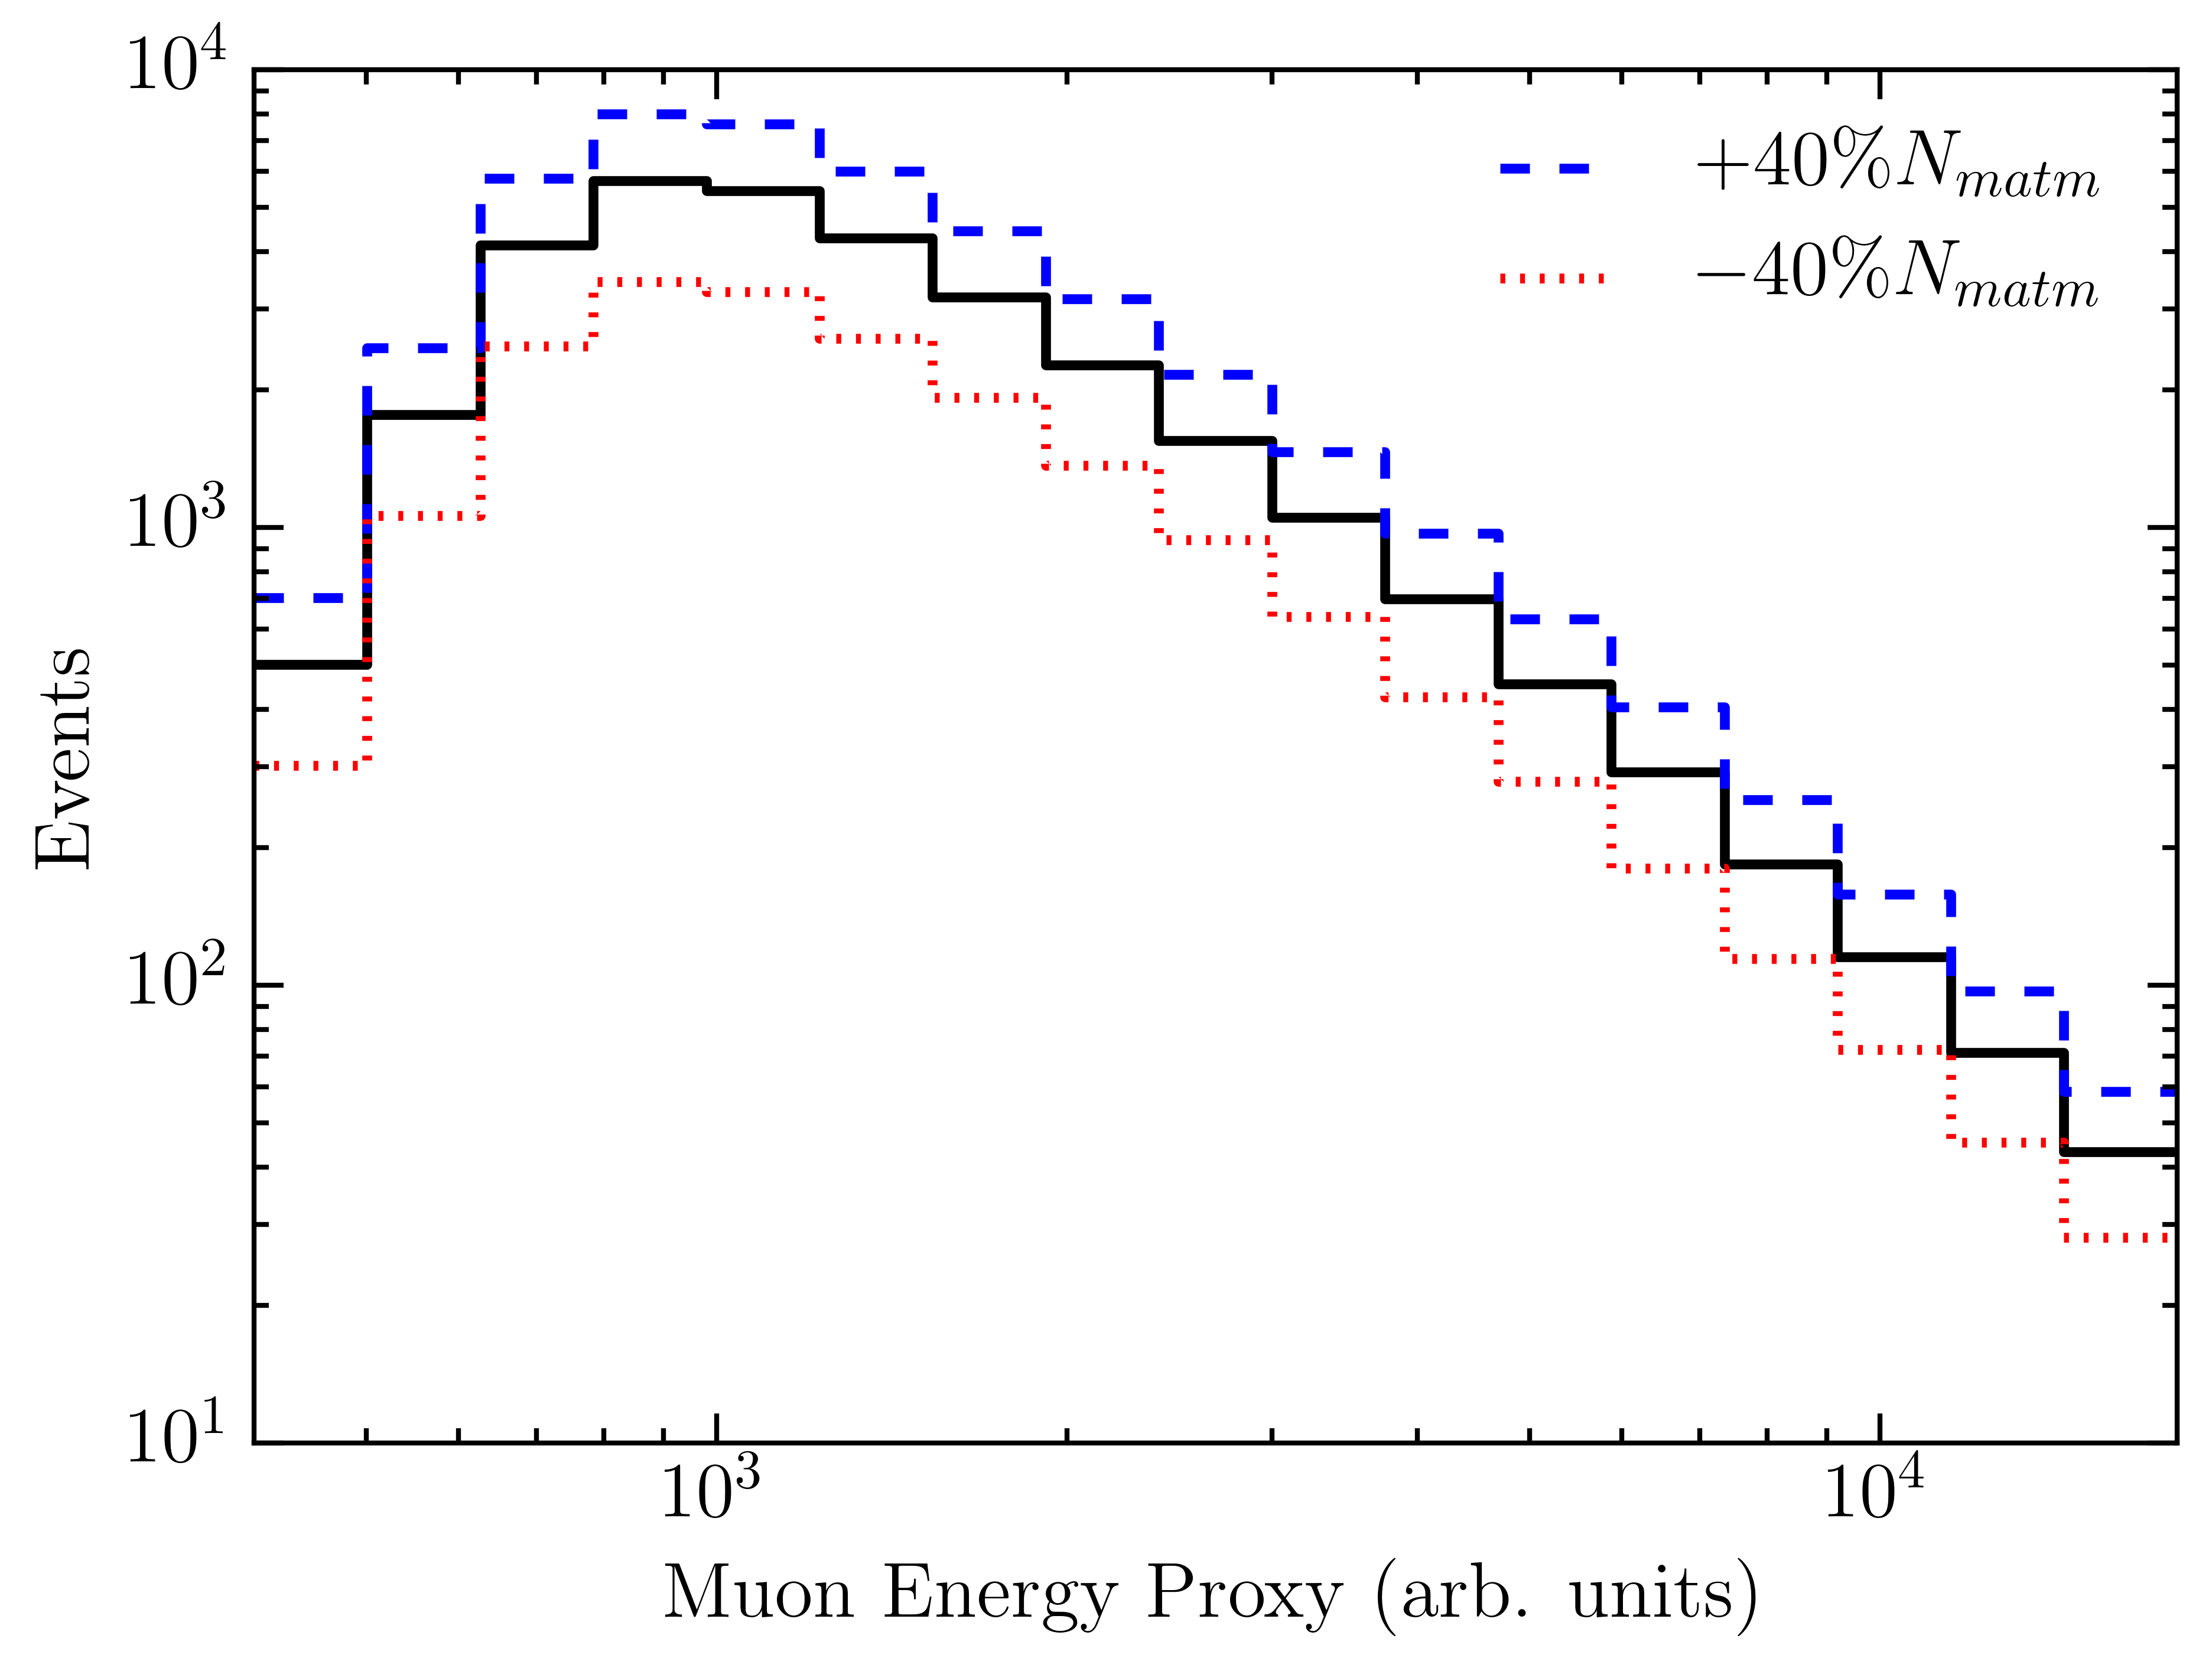

In [9]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E1, 1E4)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Muon Energy Proxy (arb. units)', fontsize=fontsize)
ax.set_ylabel(r'Events', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, norm_conv_p, drawstyle='steps-pre', label='$+40\% N_{\rm{atm}}$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, norm_conv_n, drawstyle='steps-pre', label='$-40\% N_{\rm{atm}}$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

matplotlib2tikz.save("syst_convnorm.tex")

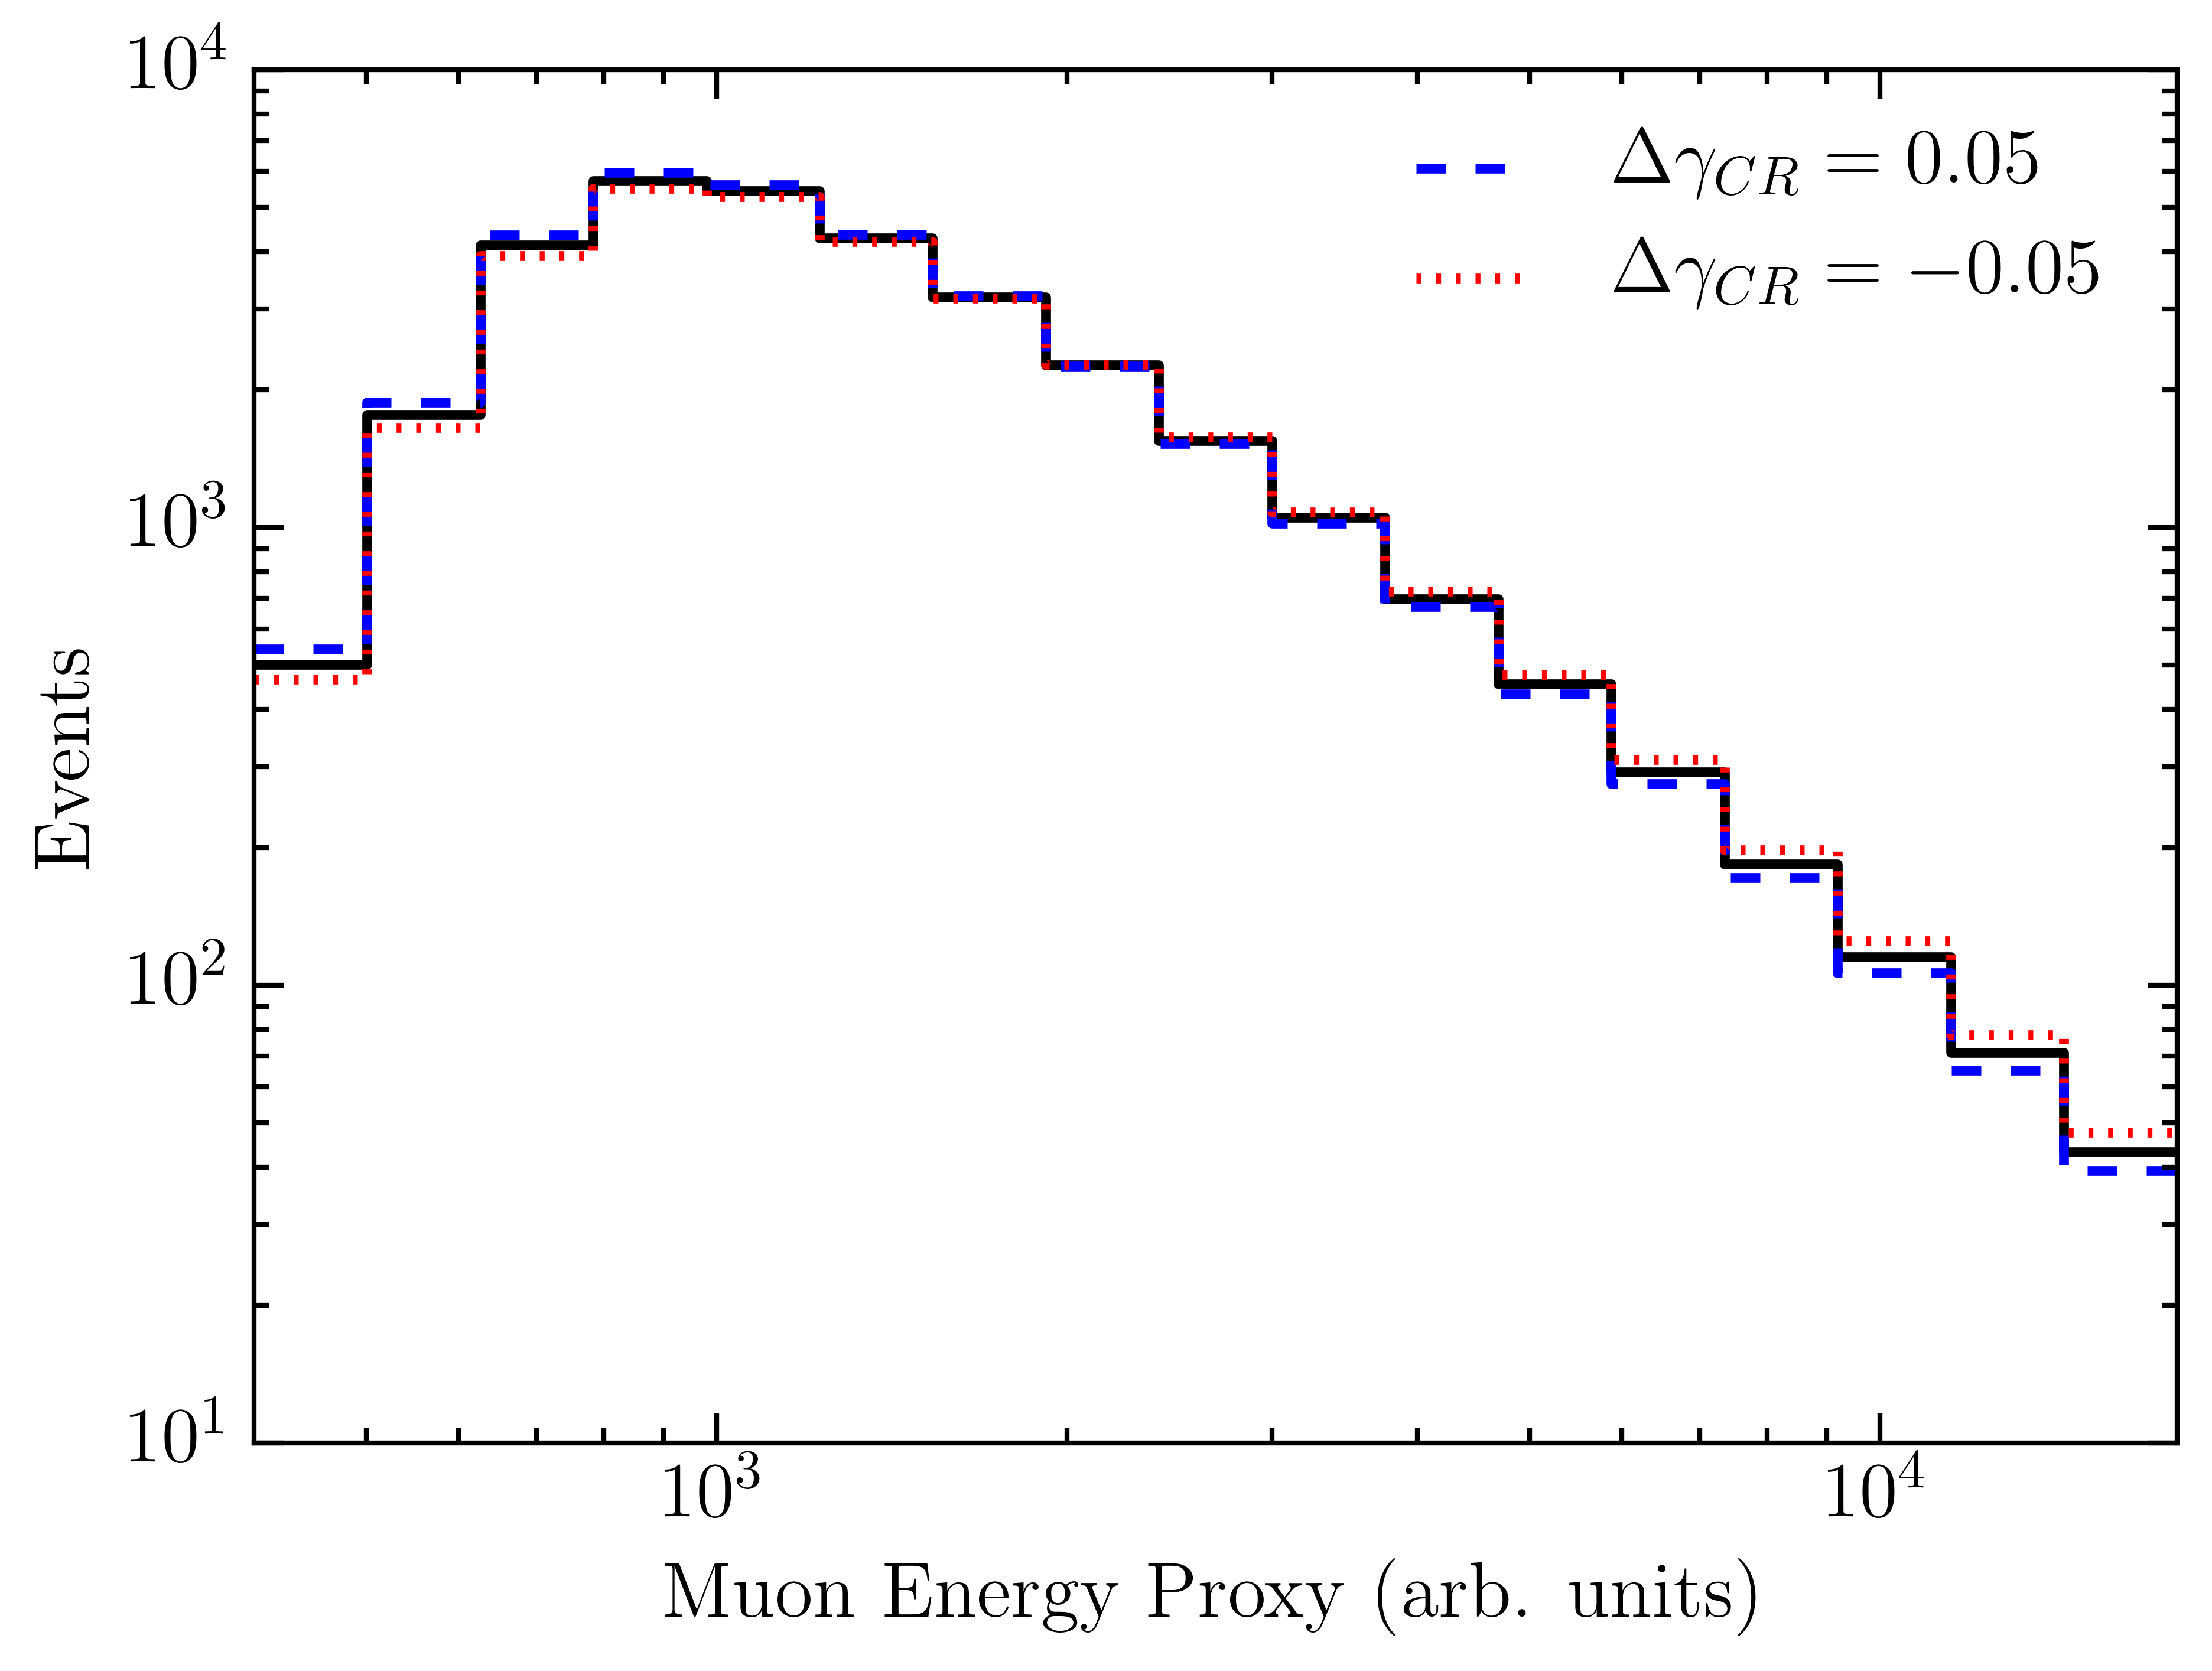

In [10]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E1, 1E4)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Muon Energy Proxy (arb. units)', fontsize=fontsize)
ax.set_ylabel(r'Events', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, dCR_index_p, drawstyle='steps-pre', label='$\Delta\gamma_{CR}=0.05$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, dCR_index_n, drawstyle='steps-pre', label='$\Delta\gamma_{CR}=-0.05$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

matplotlib2tikz.save("syst_dCR_index.tex")

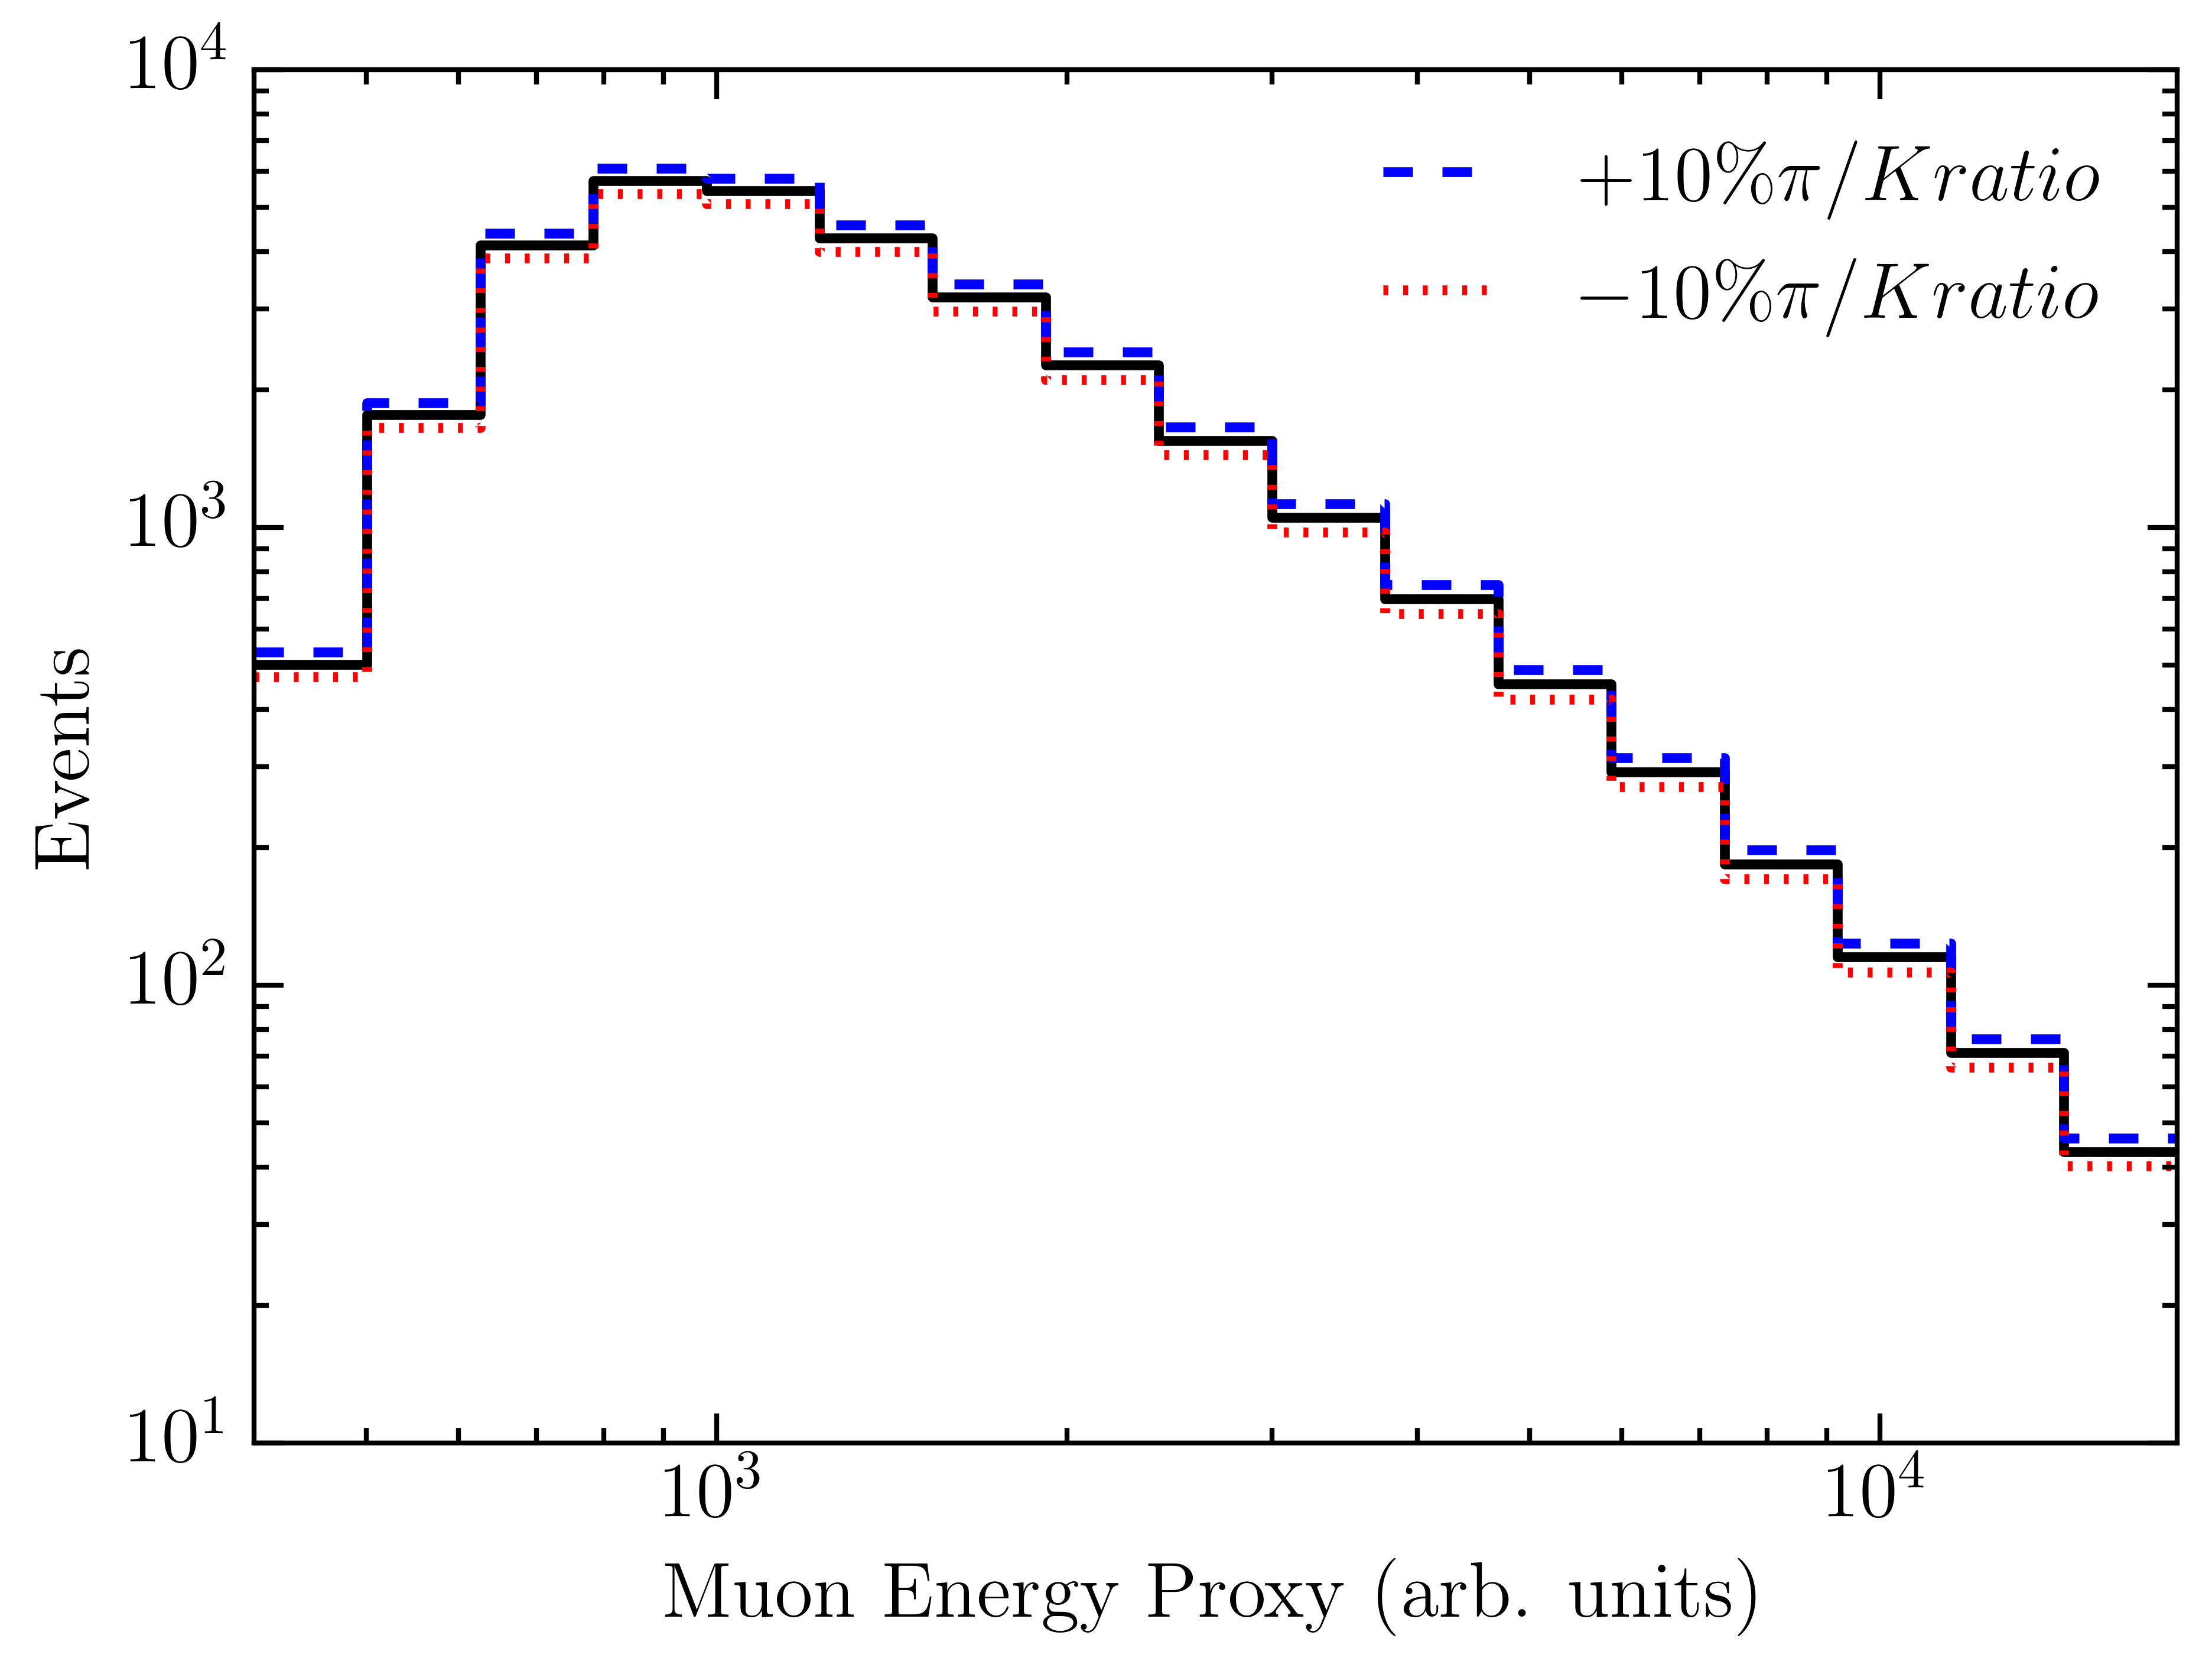

In [11]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E1, 1E4)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Muon Energy Proxy (arb. units)', fontsize=fontsize)
ax.set_ylabel(r'Events', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, pik_p, drawstyle='steps-pre', label='$+10\% \pi/K ratio$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, pik_n, drawstyle='steps-pre', label='$-10\% \pi/K ratio$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

matplotlib2tikz.save("syst_pik.tex")

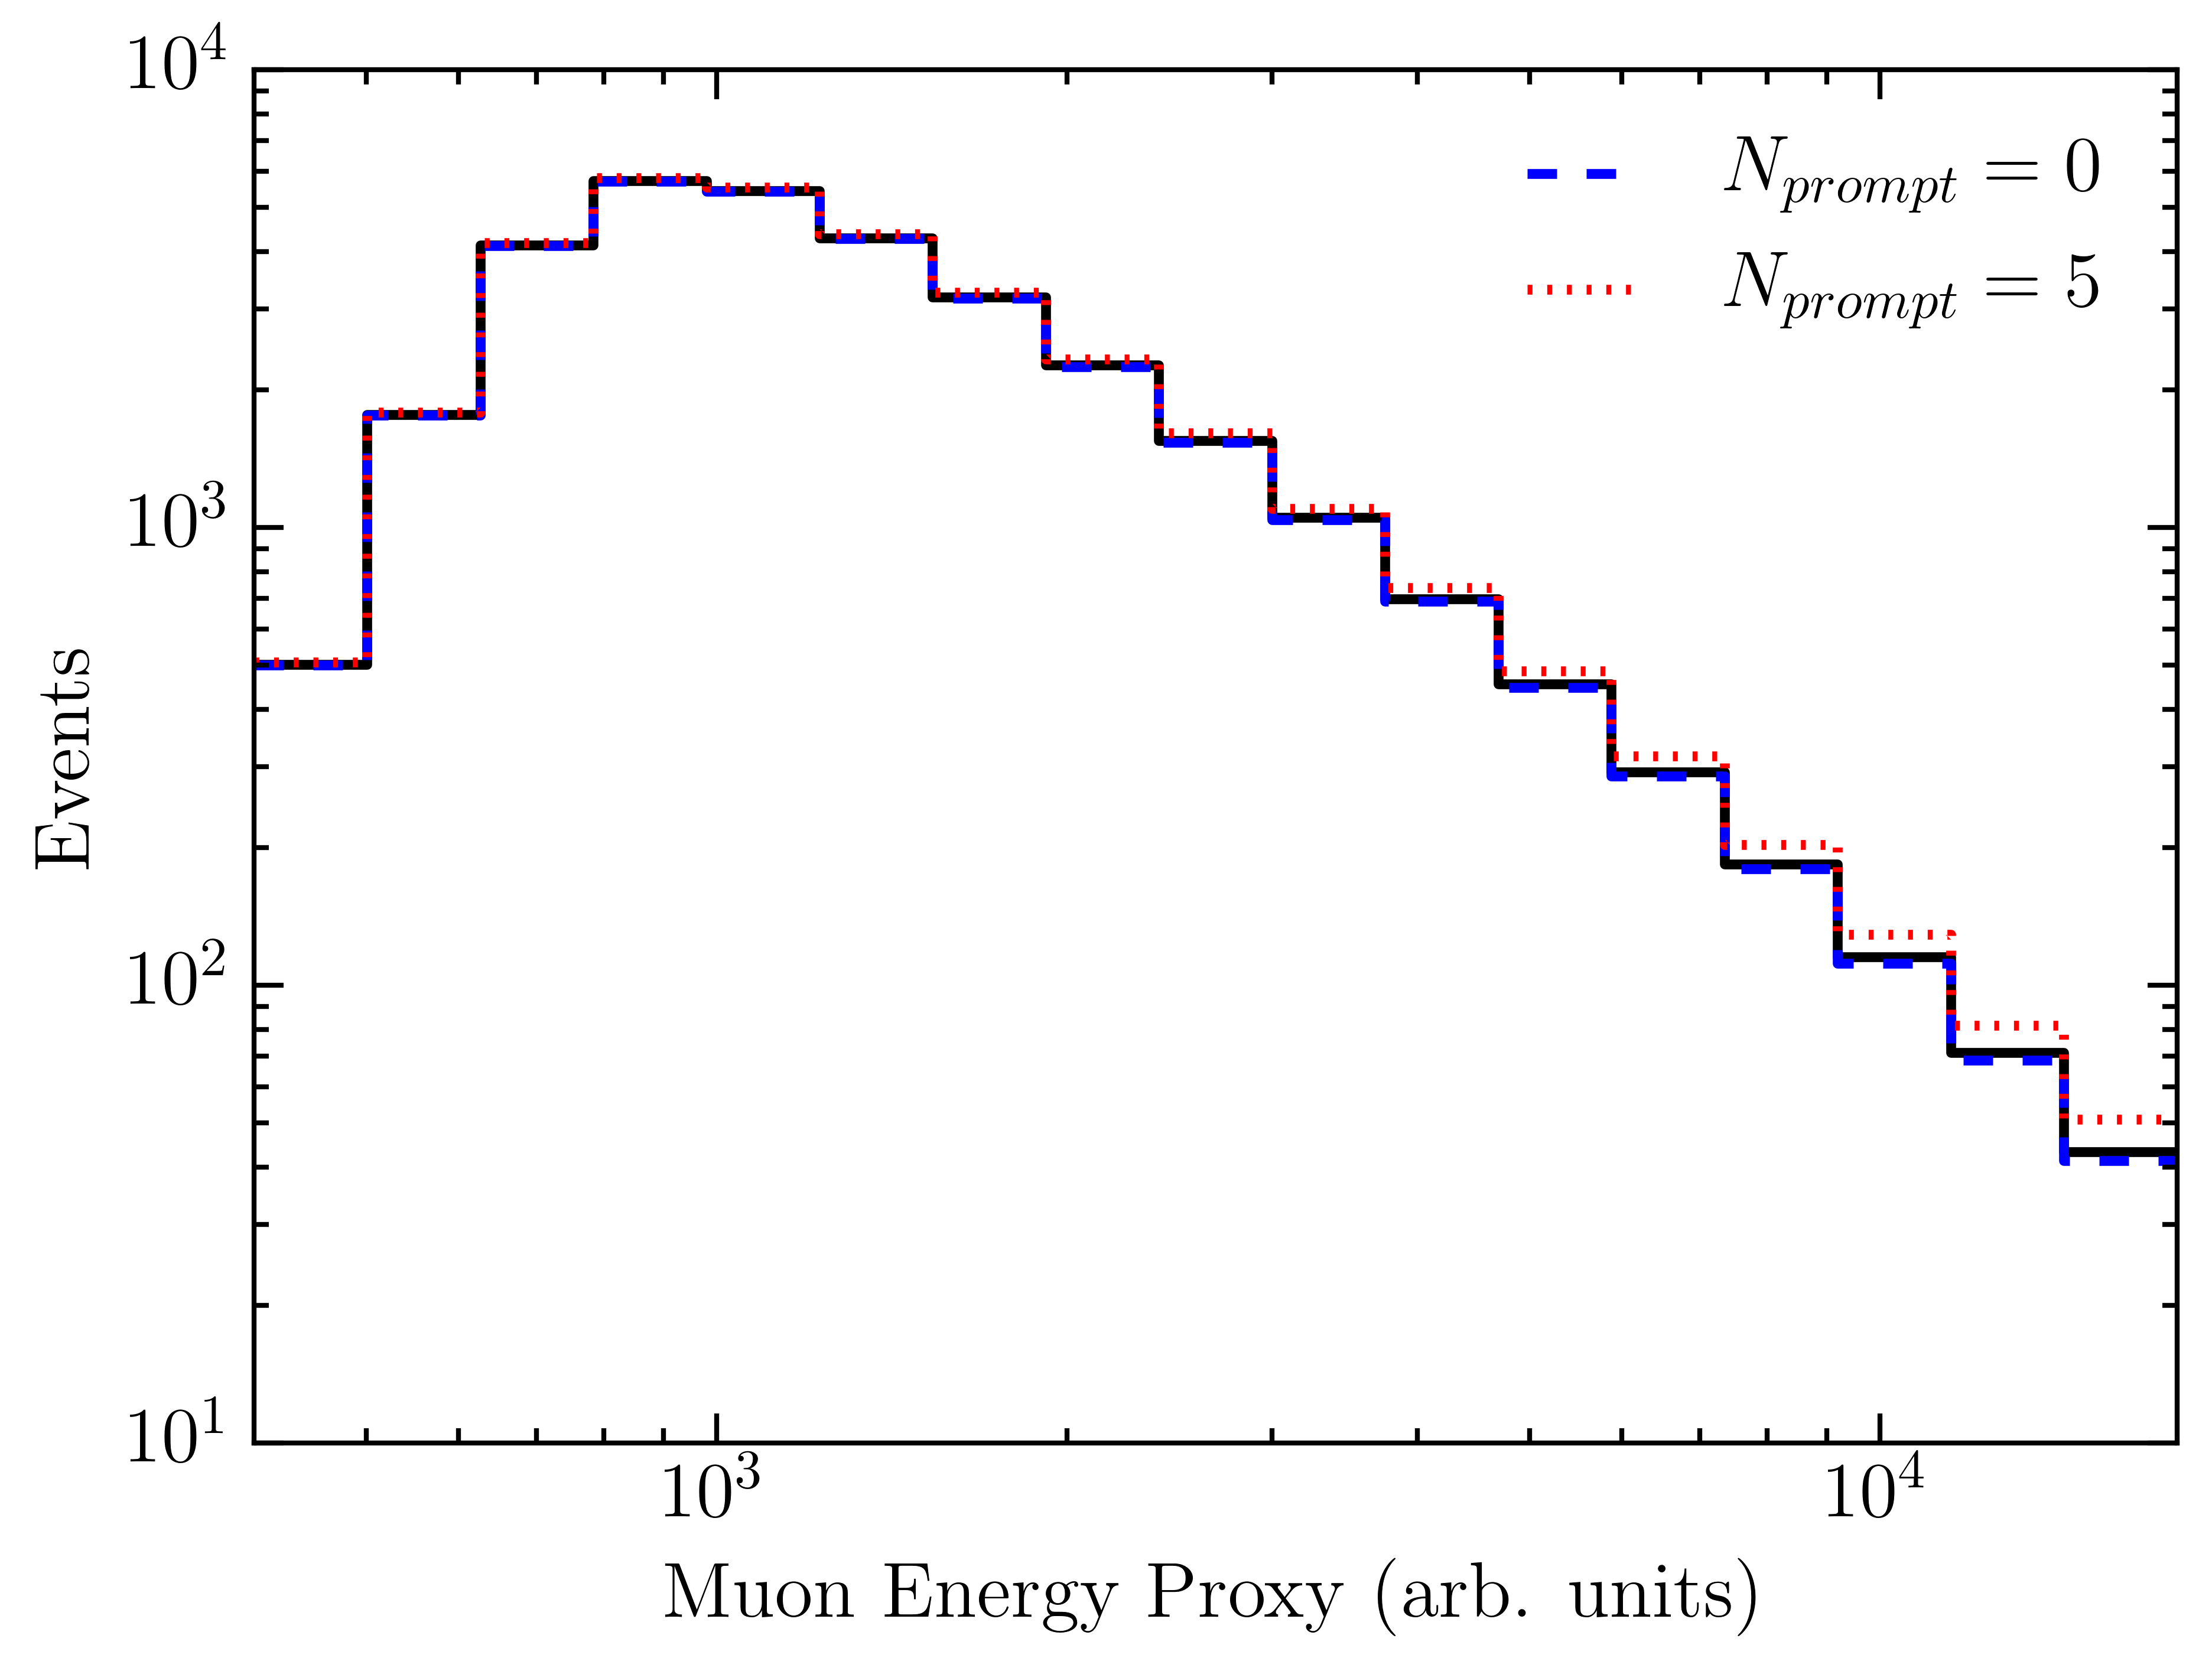

In [12]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E1, 1E4)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Muon Energy Proxy (arb. units)', fontsize=fontsize)
ax.set_ylabel(r'Events', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, prompt_p, drawstyle='steps-pre', label='$N_{prompt}=0$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, prompt_n, drawstyle='steps-pre', label='$N_{prompt}=5$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

matplotlib2tikz.save("syst_prompt.tex")

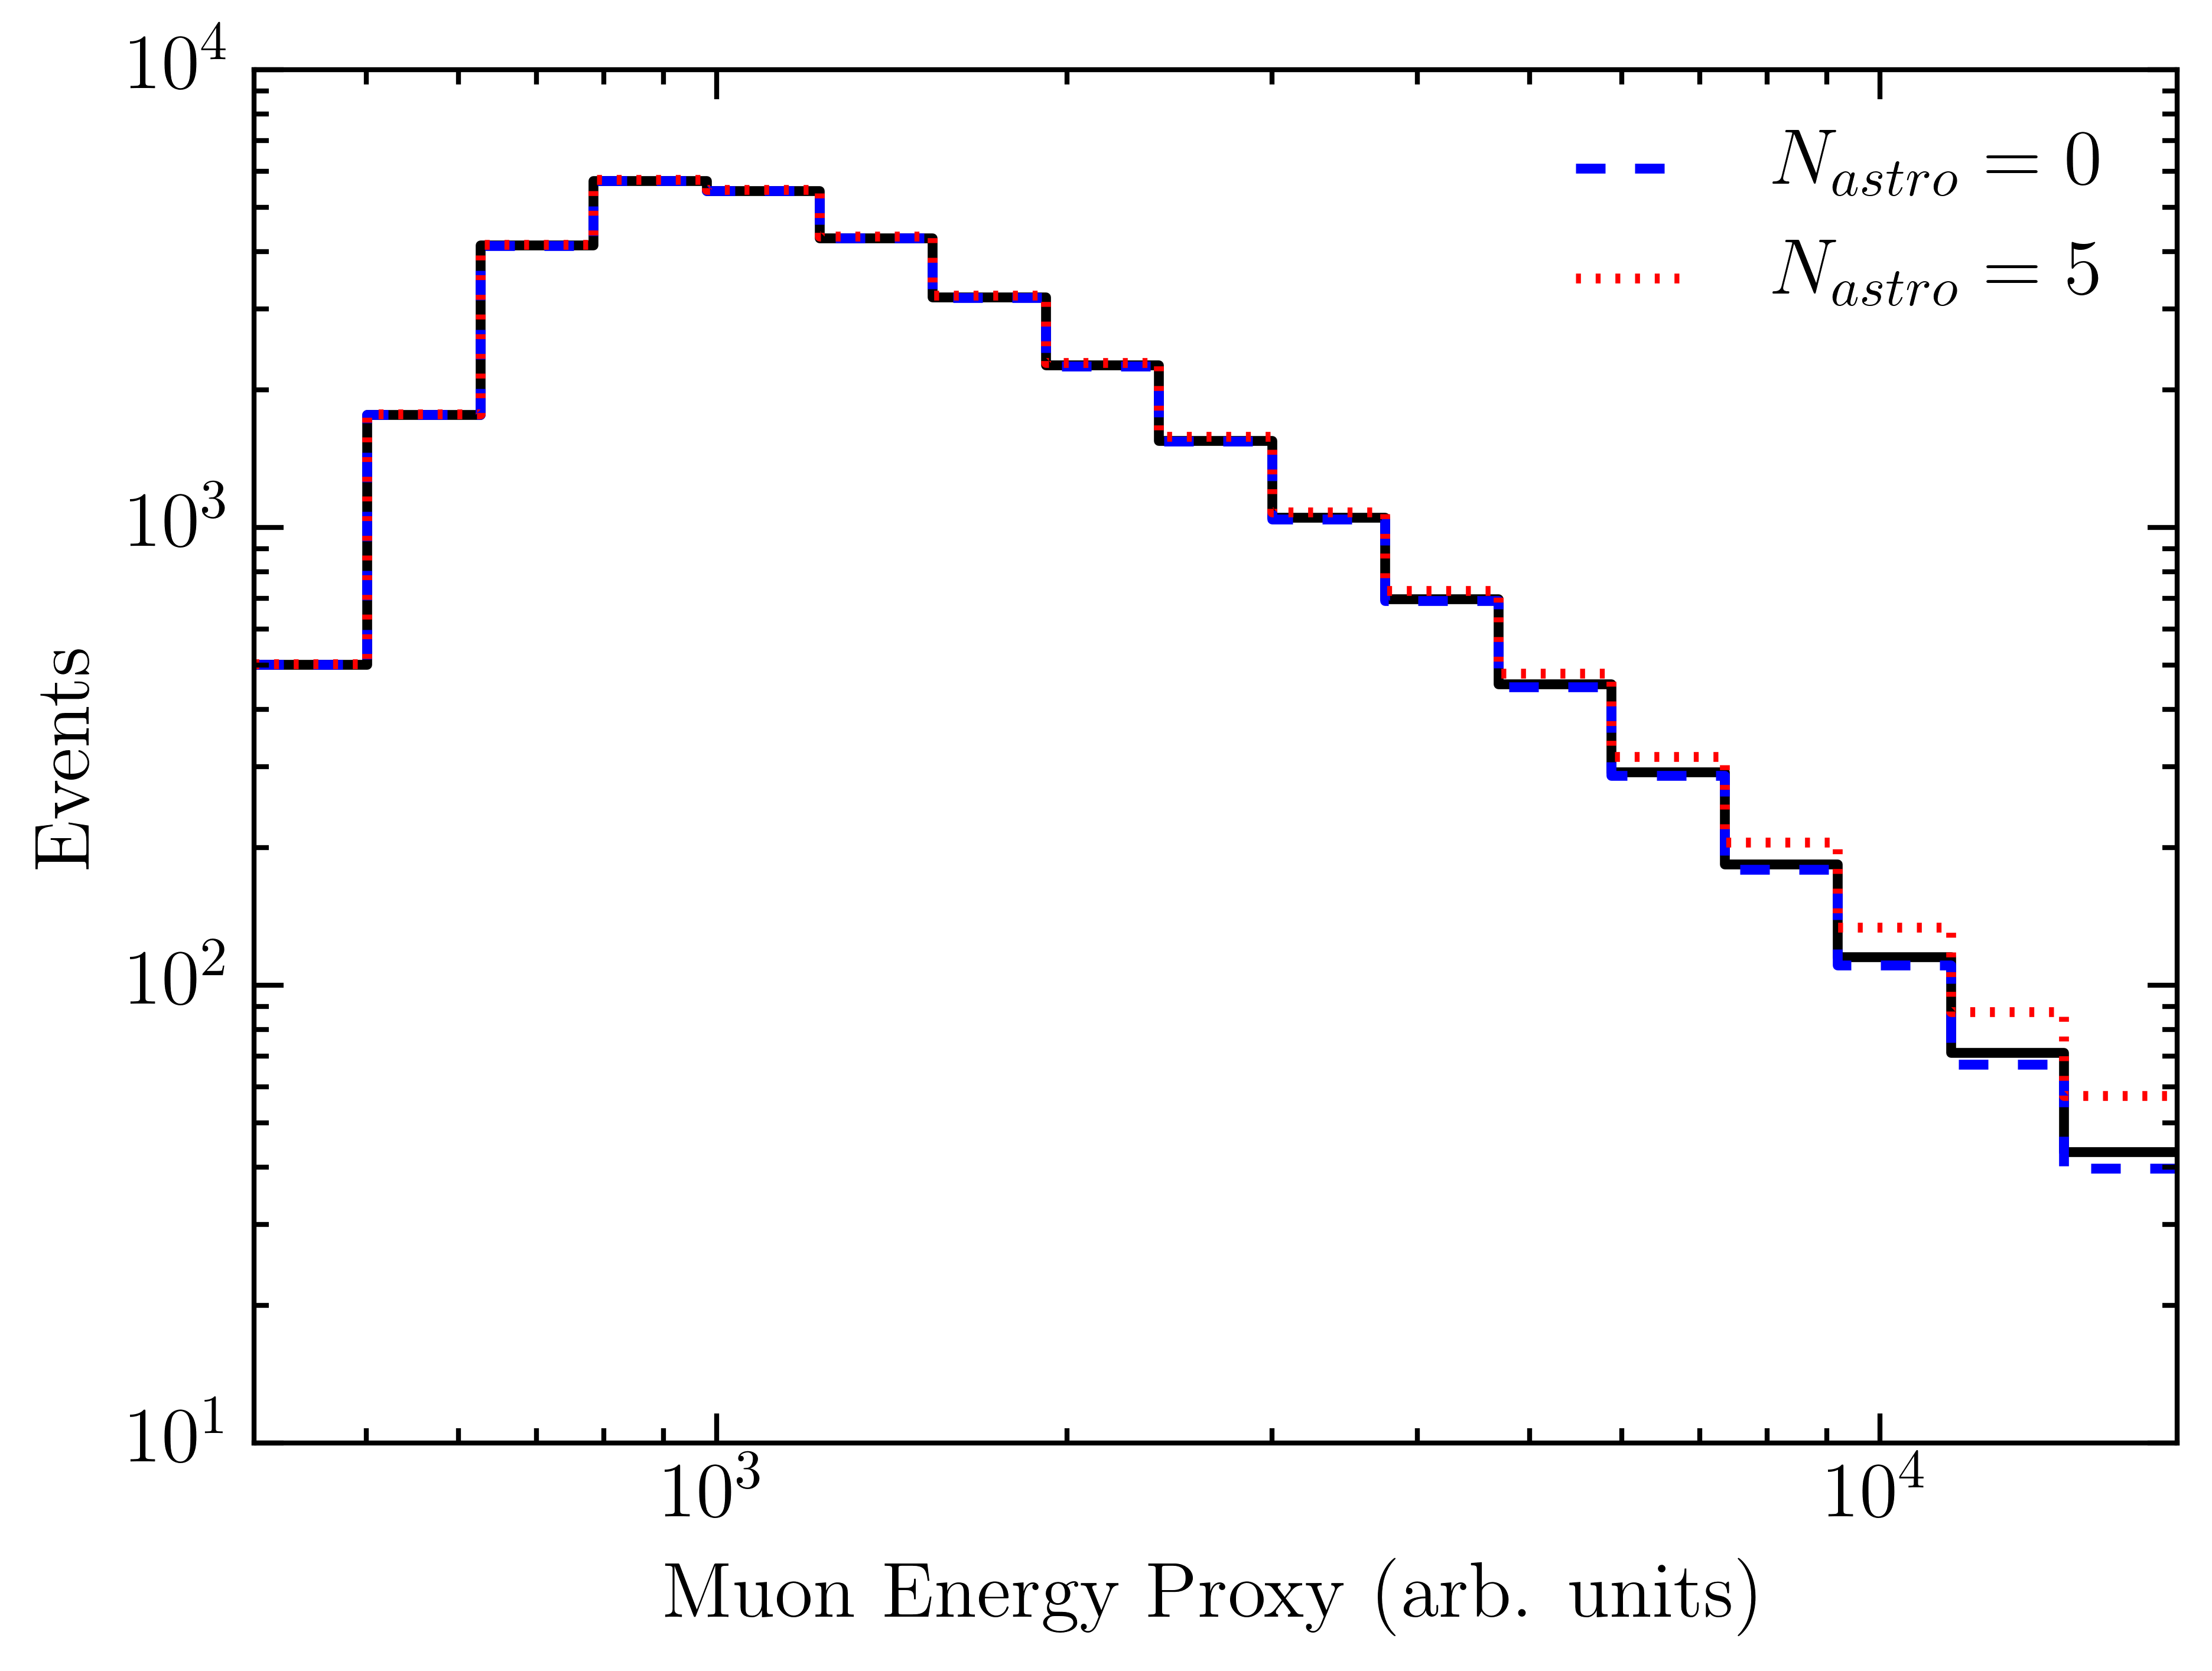

In [13]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E1, 1E4)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Muon Energy Proxy (arb. units)', fontsize=fontsize)
ax.set_ylabel(r'Events', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, astro_p, drawstyle='steps-pre', label='$N_{astro}=0$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, astro_n, drawstyle='steps-pre', label='$N_{astro}=5$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

matplotlib2tikz.save("syst_astro.tex")

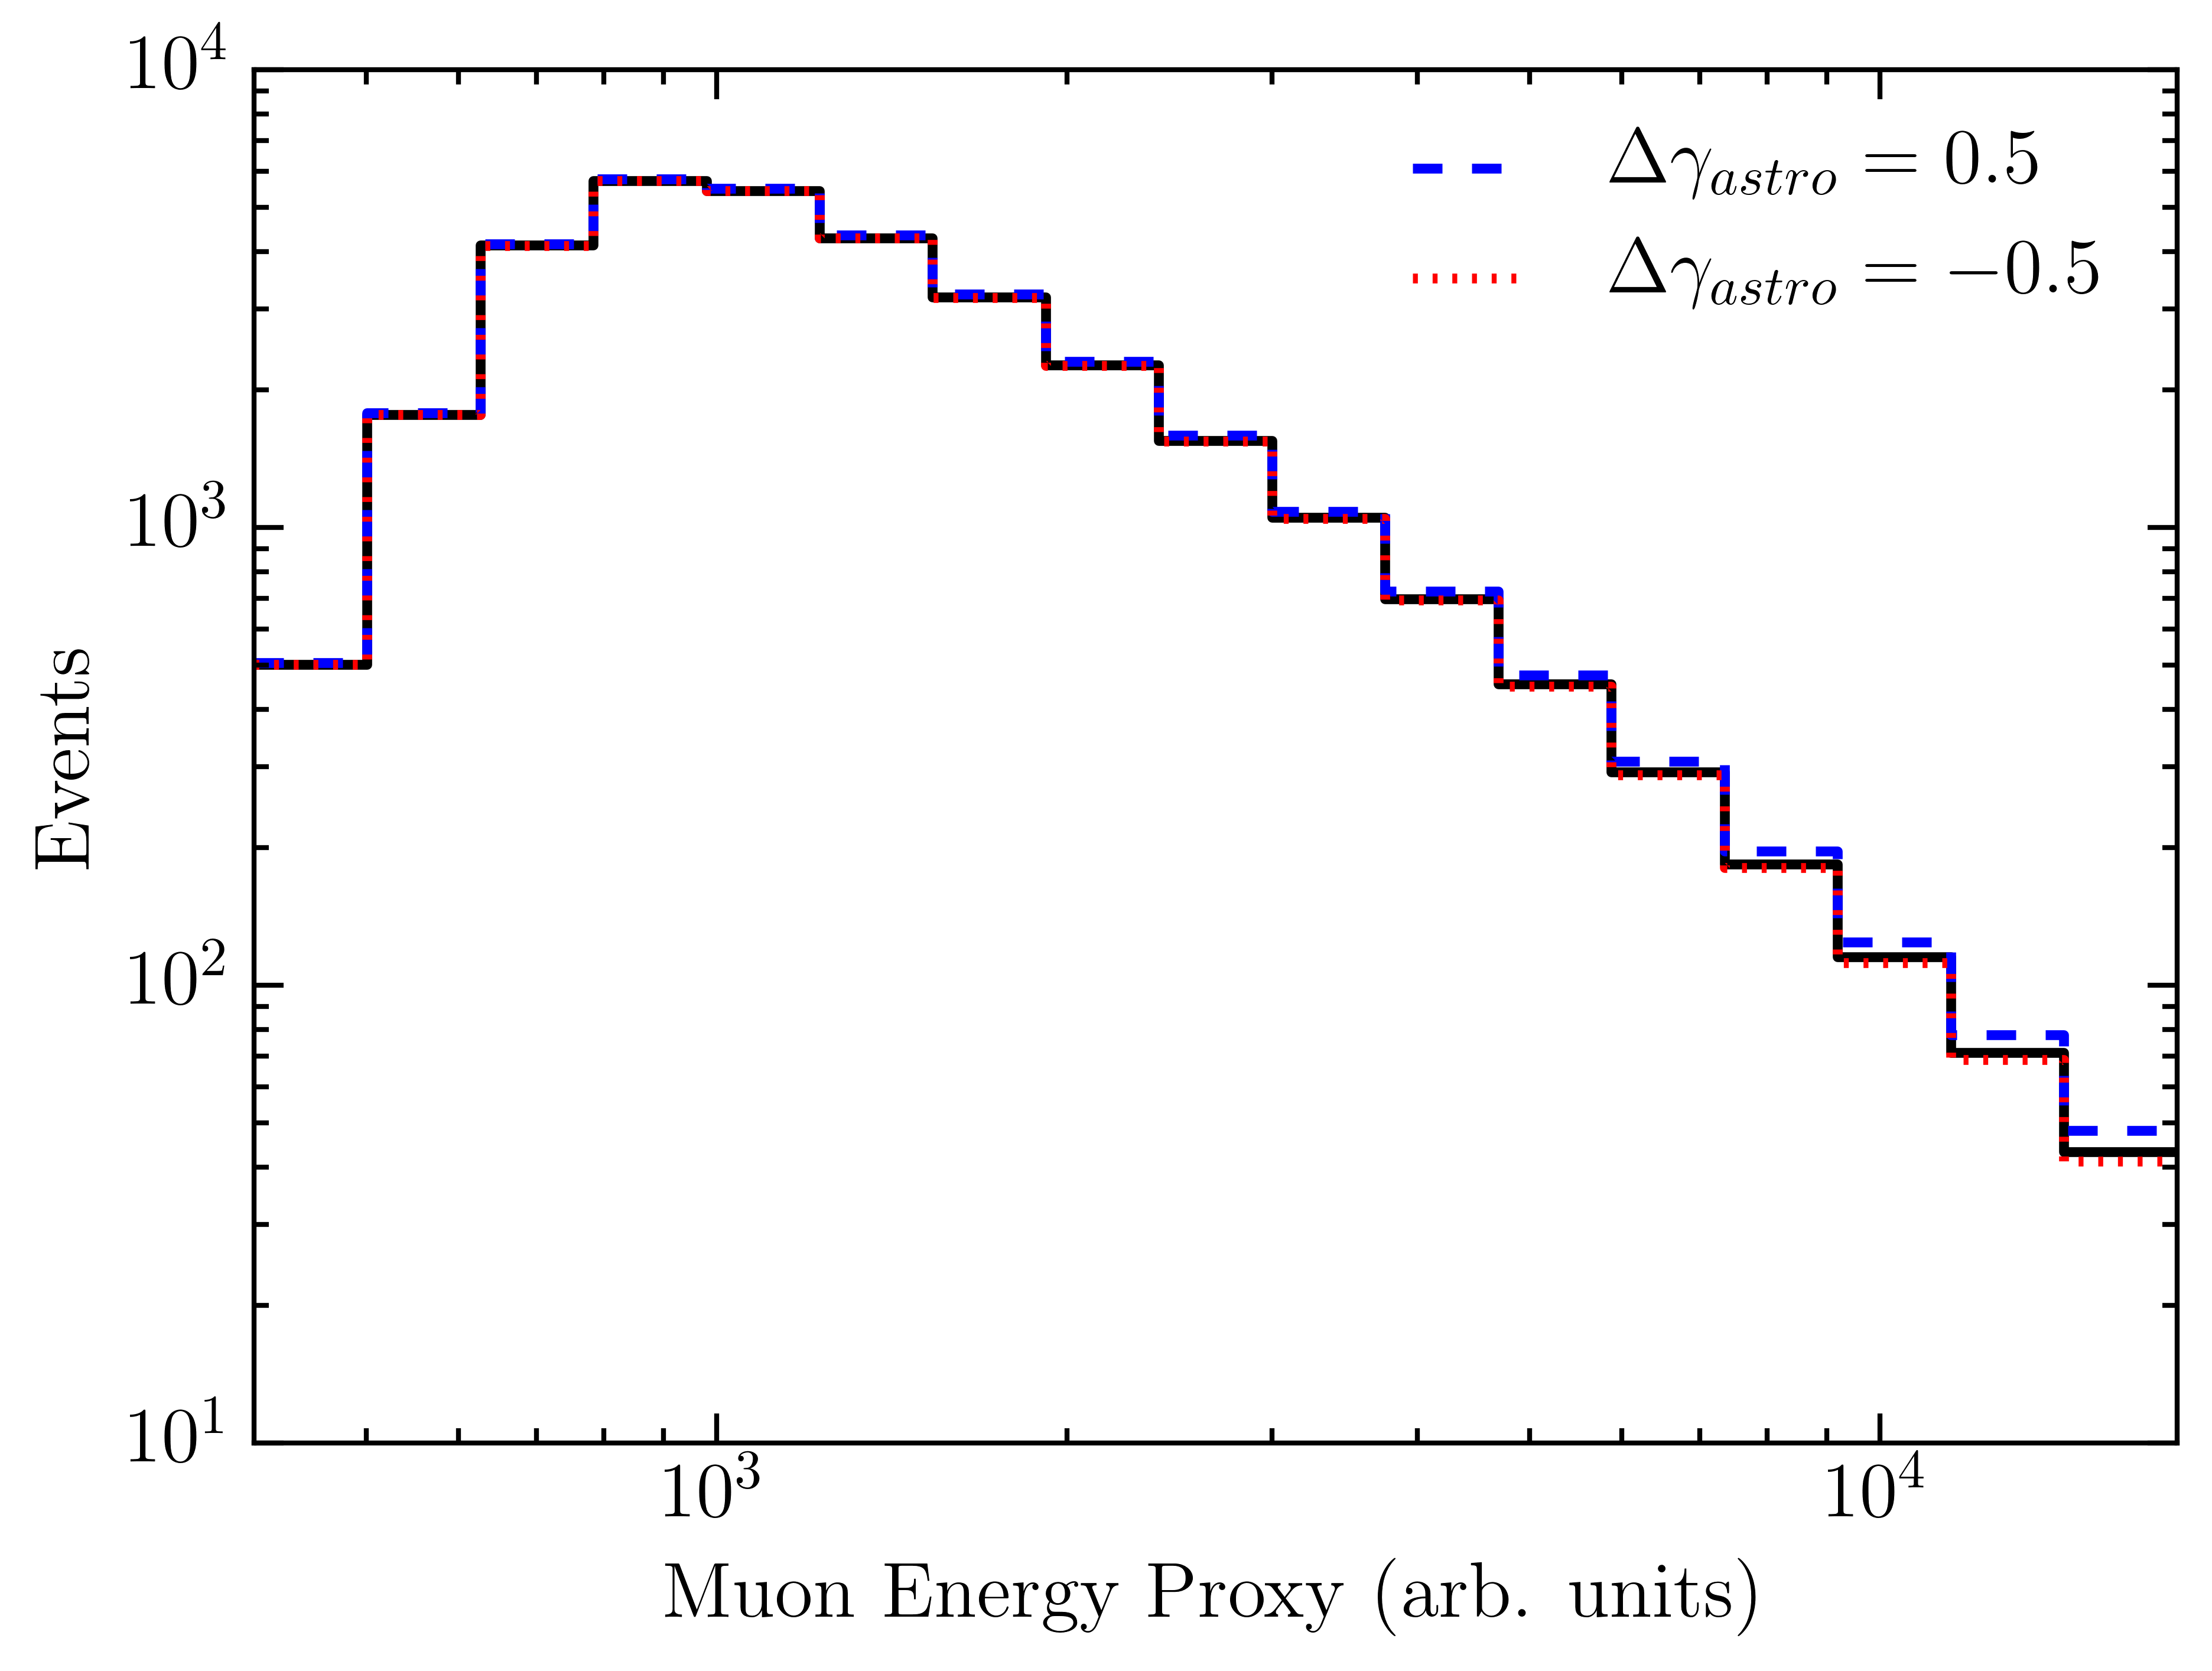

In [14]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E1, 1E4)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Muon Energy Proxy (arb. units)', fontsize=fontsize)
ax.set_ylabel(r'Events', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, dastro_index_p, drawstyle='steps-pre', label='$\Delta\gamma_{astro}=0.5$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, dastro_index_n, drawstyle='steps-pre', label='$\Delta\gamma_{astro}=-0.5$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

matplotlib2tikz.save("syst_dastro_index.tex")